In [514]:
# %load batch_data_generator.py
'''
The purpose of this file is to use Python to make the images to train AI models with.

Dependencies: python 3.6.2, numpy, matplotlib, pillow

Python is a bit more accessible than Matlab; therefore, this file will be better for
making training images in the long run.
'''


from PIL import Image, ImageFont, ImageDraw
import matplotlib.pyplot as plt
from os.path import isfile, join
from os import listdir
import os
from random import randint
import numpy as np

%matplotlib inline

# load backgrounds and shapes
cwd = os.getcwd()
backgrounds_path = join(cwd, 'backgrounds')
backgrounds = [f for f in listdir(backgrounds_path) if isfile(join(backgrounds_path, f))]
backgrounds_raw = []
for files in backgrounds:
    im = Image.open(join(backgrounds_path,files))
    im = im.convert('RGB')
    im = np.asarray(im, dtype=np.uint8)
    im.setflags(write=1) # make image writable
    backgrounds_raw.append(im)

shapes_path = join(cwd, 'assets', 'shape_templates')
shapes = [f for f in listdir(shapes_path) if isfile(join(shapes_path, f))]
shapes_raw = []
for files in shapes:
    im = Image.open(join(shapes_path,files))
    im = im.convert('L') # make it boolean
    im = np.asarray(im)
    shapes_raw.append(im)


alphanumeric_vector = ['A', 'B', 'C', 'D', 'E', 'F', \
                       'G', 'H', 'I', 'J', 'K', 'L', \
                       'M', 'N', 'O', 'P', 'Q', 'R', \
                       'S', 'T', 'U', 'V', 'W', 'X', \
                       'Y', 'Z', '1', '2', '3', '4', \
                       '5', '6', '7', '8', '9']


# choose random alphanumeric and background
letter = alphanumeric_vector[randint(0,len(alphanumeric_vector)-1)]
background = backgrounds_raw[randint(0,len(backgrounds)-1)]
shape = shapes_raw[randint(0,len(shapes)-1)]

# choose random color
color_of_background = np.array([randint(0,255),randint(0,255),randint(0,255)])
color_of_letter =     np.array([randint(0,255),randint(0,255),randint(0,255)])
color_difference = np.sqrt(np.sum(np.square(color_of_background-color_of_letter)))
# make sure the color difference is greater than 7
while color_difference < 7:
    color_of_letter = np.array([randint(0,255),randint(0,255),randint(0,255)])
    color_difference = np.sqrt(np.sum(np.square(color_of_background-color_of_letter)))
    
    
# draw random shape to a random background
x_coor, y_coor = np.where(shape==False)
x_max = background.shape[0]-1 - shape.shape[0]-1
y_max = background.shape[1]-1 - shape.shape[1]-1
change_x = randint(0, x_max)
change_y = randint(0, y_max)
x_tr = x_coor + change_x
y_tr = y_coor + change_y
background_mask = (x_tr, y_tr)
background[background_mask] = color_of_background


# draw letter on picture
im = Image.fromarray(background)
draw = ImageDraw.Draw(im)
font_path = join(cwd, "fonts", "Arial.ttf")
font_size = 25
font = ImageFont.truetype(font_path, font_size)
# change color to rgba
rgba_color = tuple(color_of_letter.tolist() + [0])
draw.text((12+change_y, 8+change_x), letter, font=font, fill=rgba_color)


# create jpeg


# create xml file





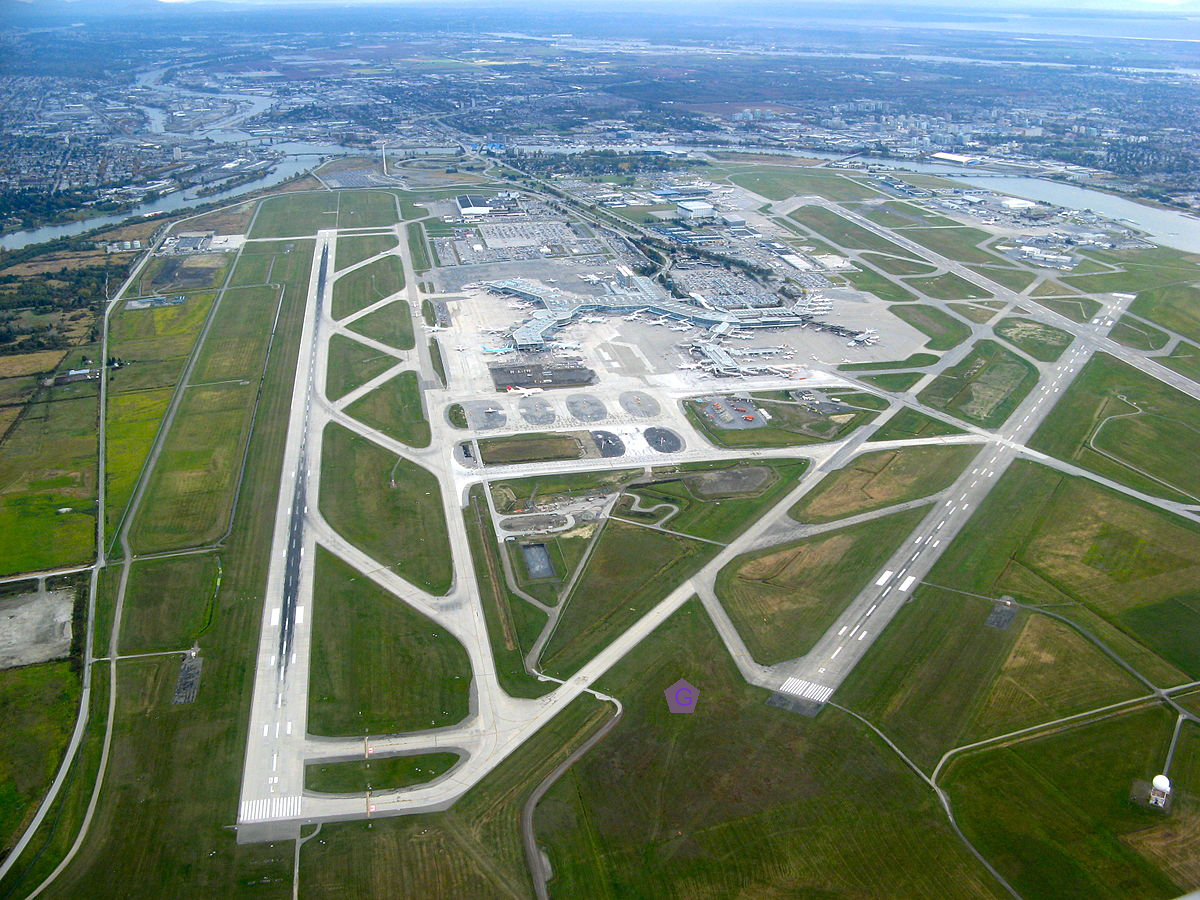

In [515]:
im

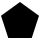

In [516]:
im = Image.fromarray(shape)
im

In [517]:
x_max = background.shape[0]
y_max = background.shape[1]
change_x = randint(0, x_max)
change_y = randint(0, y_max)
x_tr = x_coor + change_x
y_tr = y_coor + change_y

In [390]:
A = np.array([1,1,1,1])
B = np.array([0,0,0,0,0,0])
mask = [1,0,0,1]
mask = np.where(np.array(mask)>0)
new_mask = (np.array([mask[0][0]+1, mask[0][1]+1]))

In [391]:
A[mask] = B[new_mask]  # B goes to A

In [408]:
letter


'8'